Test started on 2023-07-03 01:42:34.033708
Test ended on 2023-07-25 01:41:19.152664
Experiment lasted 22 days
Total amount of observations is 19998
            count  conversion        CR
test_group                             
a           10013         611  0.061021
b            9985         889  0.089034
T-test value equals 7.53, p-value equals 0.0


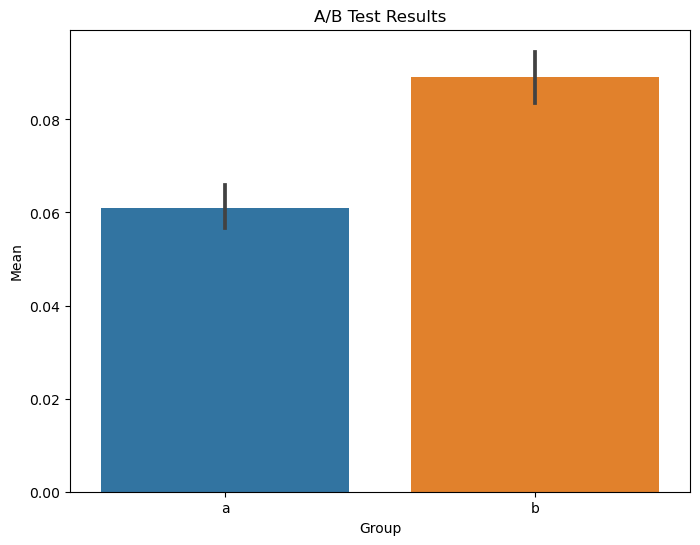

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

ABdata = pd.read_csv("ab_test_data.csv")

print(f'Test started on {min(ABdata["timestamp"])}')
print(f'Test ended on {max(ABdata["timestamp"])}')

date_end = pd.to_datetime(max(ABdata["timestamp"]))
date_start = pd.to_datetime(min(ABdata["timestamp"]))
diff = date_end - date_start
diff = round(diff/np.timedelta64(1, 'D'))
print(f'Experiment lasted {diff} days')

print(f'Total amount of observations is {ABdata["user_id"].nunique()}')

grouped = ABdata[["test_group", "conversion"]].groupby(by = "test_group").agg(
{
    "test_group" : "count", 
    "conversion" : "sum"
})
grouped = grouped.rename(columns={"test_group": "count"})
grouped.reset_index()
grouped["CR"] = grouped["conversion"]/grouped["count"]

print(grouped)

statistic, pvalue = stats.ttest_ind(ABdata[ABdata['test_group'] == 'b']['conversion'],
                                    ABdata[ABdata['test_group'] == 'a']['conversion'], 
                                    alternative='less')
print(f"T-test value equals {round(statistic, 3)}, p-value equals {round(1-pvalue, 5)}")

plt.figure(figsize=(8, 6))
sns.barplot(x=ABdata['test_group'], 
            y=ABdata['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.savefig('foo.pdf')
plt.show()

